In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# read training data
train_data=[]
with open('train.csv', 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        train_data.append(terms)

In [3]:
# read training data
test_data=[]
with open('test.csv', 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        test_data.append(terms)

In [4]:
# X_train, y_train
train_data = np.array( train_data,dtype='float64')
test_data = np.array(test_data,dtype='float64')

X_train = np.append(np.ones((train_data.shape[0], 1),dtype='float64'), train_data[:, 0:7], 1)
y_train = train_data[:,7].flatten()

#X_test, y_test
X_test = np.append(np.ones((test_data.shape[0], 1),dtype='float64'), test_data[:, 0:7], 1)
y_test = test_data[:,7].flatten()


In [18]:
def SGD(X, y, lr, tolerance, max_iter):
    
    w = np.zeros(X.shape[1])
    Loss = []

    for t in range(max_iter):
        idx = random.randrange(X.shape[0])
        X1=X[idx]
        y1=y[idx]

        grad = -(y1 - np.dot(w, X1)) * X1

        w -= lr * grad
        loss = 0
        for i in range(len(y)):
            loss += (y[i] - np.dot(w, X[i]))**2
        loss /=2
        #print(loss)
        Loss.append(loss)

        if np.linalg.norm(lr * grad) < tolerance:
            print('SGD converged on iter ', t, 'loss: ', loss)
            break

    return w, Loss

In [31]:
SGD(X_train, y_train,lr=0.0103,tolerance=1e-6,max_iter=10000)

(array([-0.11408051,  0.14797738, -0.00462793, -0.11635274,  0.61676757,
         0.07019886,  0.46368933,  0.21916704]),
 [22.322287524969482,
  22.21947365662503,
  22.33186713848525,
  22.483922297934036,
  22.159893357556378,
  22.06941156156591,
  22.316247902413455,
  22.209714797028102,
  22.227569987728767,
  22.158213768702783,
  22.100735075569425,
  22.01879237064593,
  22.013222126339308,
  22.26977035166093,
  22.209534965494477,
  22.131729607174698,
  22.04736504159933,
  21.819568858856567,
  21.65307451219881,
  21.637884901090278,
  21.632104537483116,
  21.602531243599305,
  21.653580460959475,
  21.72657832837859,
  21.74419628392138,
  21.6476810389468,
  21.629855555178366,
  21.667605788495525,
  21.709870886406136,
  21.579285644170994,
  21.591192467876247,
  21.291524796377175,
  21.348432069264685,
  21.396438435088935,
  21.375432596993143,
  21.409215080619028,
  21.371155740220072,
  21.376669850112425,
  21.463793355107992,
  21.462148787625235,
  21.4562

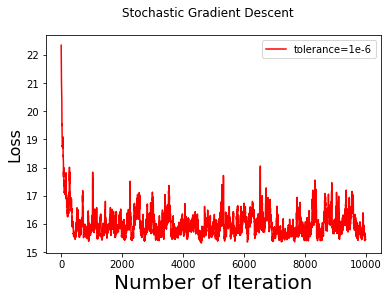

In [30]:
[w,Loss]=SGD(X_train, y_train,lr=0.0103,tolerance=1e-6,max_iter=10000)
fig = plt.figure()
fig.suptitle('Stochastic Gradient Descent')
plt.xlabel('Number of Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(Loss, 'r') 
plt.legend(['tolerance=1e-6'])
fig.savefig('SGD_new.png')

In [33]:
SGD(X_test, y_test,lr=0.0103,tolerance=1e-6,max_iter=10000)

(array([ 0.0797547 , -0.30583472, -0.62434407, -0.24068052,  0.23844679,
        -0.11846909, -0.42182715,  0.0192232 ]),
 [28.413727341754566,
  28.278415220621184,
  28.11340624903421,
  28.00596976208685,
  28.05522902765533,
  27.95967273976095,
  27.711042287608578,
  27.607790629928978,
  27.73818978480739,
  27.289653676449532,
  26.058376924746263,
  26.080003110994912,
  26.211600682371053,
  24.943082259871225,
  24.950195600263275,
  25.032781131362224,
  25.09251706413363,
  24.941509427547032,
  25.13384502711061,
  23.74700216168134,
  22.973832378486524,
  22.980389859364134,
  22.587060596329536,
  22.78481156836194,
  22.793292414852928,
  22.8511631536145,
  22.71549906756024,
  22.452532637816986,
  22.393171489543477,
  21.74314587802005,
  21.619112672753324,
  21.625874712139478,
  21.643364802506294,
  21.12599790276805,
  21.29440125350754,
  21.258933483485162,
  21.4810076588309,
  21.198707387474894,
  21.934717065833347,
  21.755949733314907,
  21.7217316069

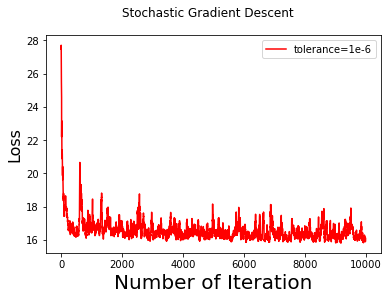

In [32]:
[w,Loss]=SGD(X_test, y_test,lr=0.0103,tolerance=1e-6,max_iter=10000)
fig = plt.figure()
fig.suptitle('Stochastic Gradient Descent')
plt.xlabel('Number of Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(Loss, 'r') 
plt.legend(['tolerance=1e-6'])
fig.savefig('SGD_new.png')